## TP 2 - Premiers algorithmes de classification

Dans ce TP nous allons explorer plusieurs algorithmes supervisés de classification. 
On rappele que la classification supervisée consiste à apprendre à classer un vecteur d'entrée $\mathbf{x_i} \in \mathbb{R}^d$ et à lui associer un label (une valeur entière) $y_i$. Pour réaliser cet apprentissage, les classifieurs vont apprendre leurs paramètres par optimisation (généralement via une descente de gradient) afin de minimiser leurs erreurs de prédiction. 

On note généralement $f(\mathbf{x}_i,\mathbf{w})$ le résultat de la prédiction faite par le classifieur $f$ avec les paramètres $\mathbf{w}$ pour le vecteur d'entrée à classer $\mathbf{x}_i$.

Nous allons explorer plusieurs algorithmes de classification dans ce TP : la classification logistique, la classification Bayésienne, les k plus proches voisins. Nous verrons également comment réaliser l'apprentissage avec des ensembles d'apprentissage et de test et comment évaluer les performances.



Importez les librairies de base dont nous aurons besoin, comme au TP précédent:

In [3]:
# import des outils mathématiques
import numpy as np

# import des outils d'affichage
import matplotlib.pyplot as plt

# import des outils de machine learning
import sklearn as skl
import sklearn.datasets as data

Classification logistique
--------

La classification logistique binaire est un algorithme de classification utilisé pour estimer la probabilité qu'une donnée appartienne à une classe particulière.

Un modèle de régression logistique calcule une somme pondérée des caractéristiques d'entrée (plus un terme de biais), puis applique la fonction logistique à cette somme afin d'obtenir une probabilité.

La prédiction de probabilité est obtenue par $f(\mathbf{w},\mathbf{x}_i)=\sigma(\mathbf{w}^T\mathbf{x})$ avec $\sigma(x)=\frac{1}{1+e^{-x}}$ la fonction logistique.

La classification peut ensuite se faire en deux classes avec la règle suivante :

$y=\left\{  \begin{array}{ll}0&\text{Si }\sigma(\mathbf{w}^T\mathbf{x})\leq 0.5\\1&\text{Si }\sigma(\mathbf{w}^T\mathbf{x})> 0.5\end{array}\right.$

Nous allons commencer par générer un dataset synthétique qui va nous servir pour expérimenter la classification logistique. Tout comme dans le TP précédent, nous allons utiliser la fonction `make_classification` de la classe `datasets` importée ci-dessus sous le nom *data* (voir la documentation à
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html ).

En vous aidant de la documentation, générez un problème de classification binaire de 1000 points avec:
- deux attributs ($x$ aura deux dimensions),
- deux dimensions informatives,
- aucun attribut redondant
- un cluster par classe
- `random_state` à 26

Les données générées (instances et labels) seront stockées dans deux tableaux nommés x et y. Affichez ces données à l'aide d'une fonction nommée `plot_data` prenant x et y en paramètres. Mettez une couleur différente par classe.

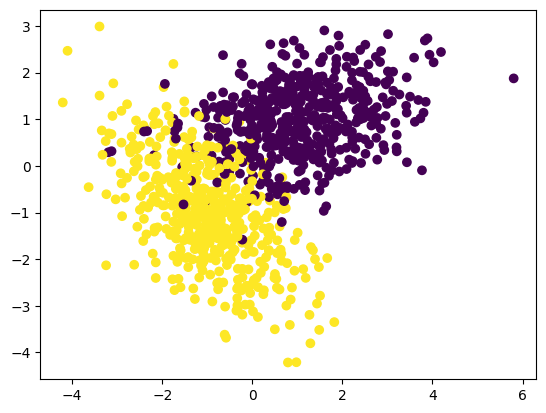

In [4]:
from sklearn.datasets import make_classification
x, y = make_classification(n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=26,n_samples=1000)
plt.figure()
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

Sur le dataset généré appliquez le classifieur `LogisticRegression()` (documentation à https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). L'usage est le même que dans le TP précédent avec `LinearRegression()` avec `fit` pour réaliser l'apprentissage et `predict` pour effectuer une classification. Faites un apprentissage sur les données x et testez sur celles-ci. Affichez le vecteur résultat de la prédiction.

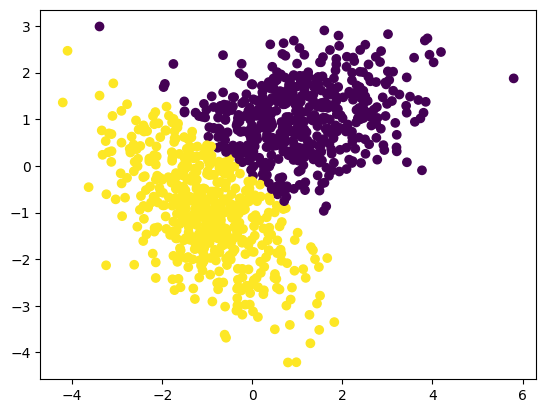

In [27]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression().fit(x, y)

y_pred = reg.predict(x)

plt.figure()
plt.scatter(x[:,0],x[:,1],c=y_pred)
plt.show()

Afin de savoir si le modèle classe correctement les données d'apprentissage, il faut l'évaluer. Utilisez la fonction `classification_report` (documentation à https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) pour afficher les performances du classifieur. Interprétez les résultats affichés.

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       502
           1       0.94      0.95      0.94       498

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



Affichons maintenant la frontière de décision que le classifieur logistique utilise. Comme le vecteur d'entrée est en 2D, la frontière de prédiction est une droite. On peut récupérer les paramètres estimés pour celle-ci dans les attributs `coef_` (coefficients de la droite) et `intercept_` (le biais). Affichez les. Ecrivez ensuite une fonction nommée `plot_decision(x, y, log_classification)` avec `log_classification` le classifier logistique. Cette fonction doit afficher une figure avec les données (avec une couleur correspondant à leur classe prédite) ainsi que la frontière de décision. Note: `coef_` et `intercept_` fournissent les coefficient $w_1, w_2$ et $w_0$ de la frontière de séparation qui a pour équation $w_1 x_1 + w_2 x_2 + w_0=0$. Il vous faudra exprimer $x_2$ en fonction de $x_1$ pour effectuer le plot de la frontière de décision.

Voici un exemple de rendu à obtenir :

![](./image1_TP2.png "Classification logistique").

Coefficients (w1, w2) : [-2.07570801 -2.52910795]
Intercept (w0) : -0.633463359031444
-2.529107946677765


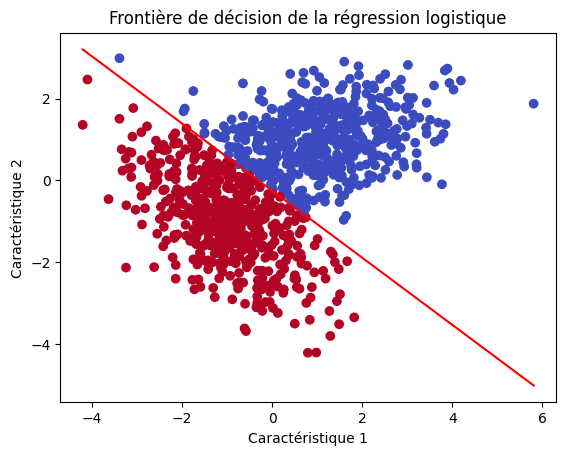

In [31]:
# Étape 1 : Créer et entraîner le modèle de régression logistique
log_classification = LogisticRegression()
log_classification.fit(x, y)

# Étape 2 : Prédire les classes des données
y_pred = log_classification.predict(x)

# Étape 3 : Afficher les points prédits en fonction de leurs classes
plt.figure()
plt.scatter(x[:, 0], x[:, 1], c=y_pred, cmap='coolwarm')  # x[:,0] et x[:,1] sont les deux caractéristiques (features) de tes données

# Étape 4 : Récupérer les coefficients (w1, w2) et l'intercept (w0)
coef = log_classification.coef_[0]  # Coefficients de la droite de décision
intercept = log_classification.intercept_[0]  # Intercept, c'est-à-dire le biais ou w0

# Afficher pour comprendre ce que c'est
print(f"Coefficients (w1, w2) : {coef}")
print(f"Intercept (w0) : {intercept}")

# Étape 5 : Calculer les valeurs de la droite de décision
# On veut tracer x2 = -(w1 * x1 + w0) / w2, qui est la forme réarrangée de la droite

# Créons des valeurs de x1 dans une plage définie (pour bien tracer la droite)
x_values = np.linspace(x[:, 0].min(), x[:, 0].max(), 100)  # 100 points de x1 entre min et max

# Calculer les valeurs de x2 correspondantes pour tracer la droite de décision
decision_boundary = -(coef[0] * x_values + intercept) / coef[1]
print(coef[1])

# Étape 6 : Tracer la frontière de décision (la droite)
plt.plot(x_values, decision_boundary, color='red', linestyle='-')

# Afficher le graphe final
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')
plt.title("Frontière de décision de la régression logistique")
plt.show()


Vous avez pu constater que le modèle fonctionne bien, mais il est testé sur les données sur lesquelles il a appris et cela biaise son évaluation qui est trop optimiste. Il faut donc que l'on divise nos données en deux sous ensembles : un pour l'apprentissage et un pour le test. Celui pour le test sera indépendant car il n'aura pas été vu durant l'apprentissage. L'évaluation du modèle sur celui-ci sera donc plus objective.

Pour répartir automatiquement les données de x et y dans des sous-ensembles d'apprentissage (x_train, y_train) (75% des données) et de test (x_test, y_test) (25% des données) , utilisez la fonction `train_test_split` (documentation à https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Refaites l'apprentissage, affichez les scores (precision/recall/...) pour ces deux modèles, et affichez (avec votre fonction  `plot_decision`) deux figures pour la classification de chacun des deux ensembles. Comparez les deux performances. On peut avoir juste la performance avec `sklearn.metrics.accuracy_score`


Accuracy: 0.956
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       139
           1       0.95      0.95      0.95       111

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



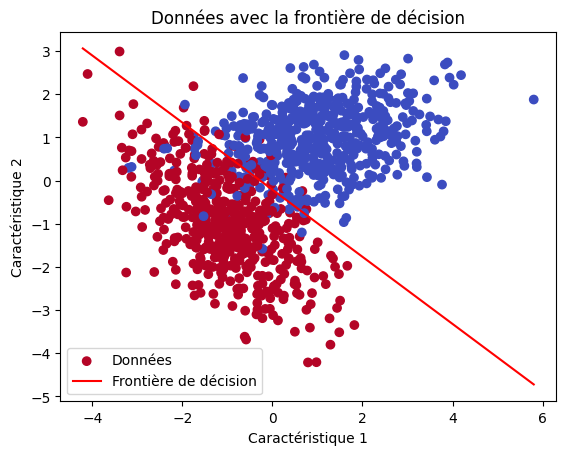

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Séparation des données en ensemble d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x, y)

# Initialisation et entraînement du modèle de régression logistique
log_classification = LogisticRegression()
log_classification.fit(x_train, y_train)

# Prédiction des classes pour l'ensemble de test
y_pred = log_classification.predict(x_test)

# Affichage des scores
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Récupérer les coefficients et l'intercept pour tracer la frontière de décision
coef = log_classification.coef_[0]
intercept = log_classification.intercept_[0]

# Créer des valeurs pour x1 (première caractéristique) pour tracer la droite de décision
x_values = np.linspace(x[:, 0].min(), x[:, 0].max(), 100)

# Calculer x2 pour chaque x1 en utilisant l'équation de la droite de décision
decision_boundary = -(coef[0] * x_values + intercept) / coef[1]

# Afficher les points de données
plt.figure()
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm', label='Données')  # Les points colorés par leur classe réelle

# Tracer la frontière de décision
plt.plot(x_values, decision_boundary, color='red', label='Frontière de décision')

# Ajouter des labels et une légende
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')
plt.title("Données avec la frontière de décision")
plt.legend()

# Afficher le graphique
plt.show()

Les scores de précision/recall/f1-score sont utiles pour quantifier les performances d'un classifieur, mais ils ne donnent pas de détails sur quelles erreurs sont faites. Pour cela il faut calculer la matrice de confusion avec `sklearn.metrics.confusion_matrix` et l'afficher avec `sklearn.metrics.ConfusionMatrixDisplay` (voir documentation de scikit-learn). Faites le pour les données de train et test.


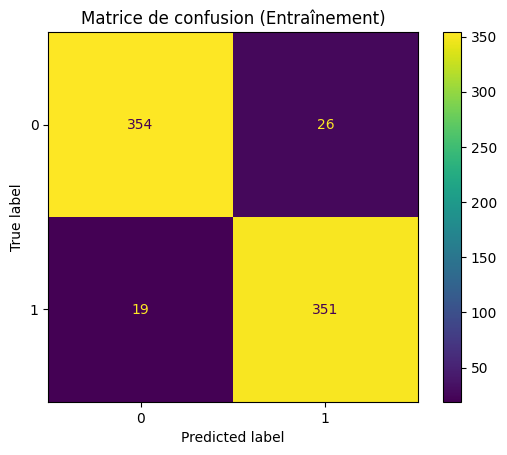

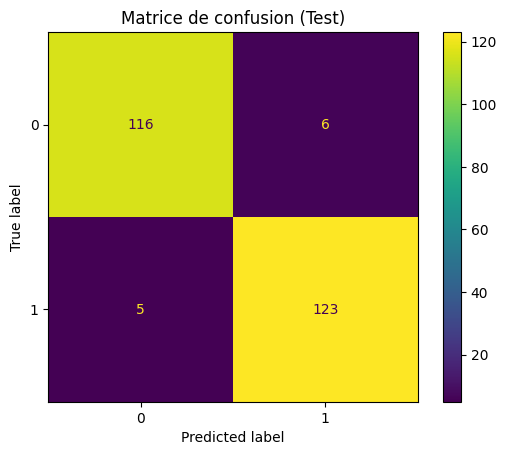

Accuracy (Entraînement) : 0.94
Classification report (Entraînement) :
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       380
           1       0.93      0.95      0.94       370

    accuracy                           0.94       750
   macro avg       0.94      0.94      0.94       750
weighted avg       0.94      0.94      0.94       750

Accuracy (Test) : 0.956
Classification report (Test) :
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       122
           1       0.95      0.96      0.96       128

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Diviser les données en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x, y)

# Créer et entraîner le modèle de régression logistique
log_classification = LogisticRegression()
log_classification.fit(x_train, y_train)

# Prédire sur l'ensemble d'entraînement et de test
y_train_pred = log_classification.predict(x_train)
y_test_pred = log_classification.predict(x_test)

# Calculer et afficher la matrice de confusion pour l'ensemble d'entraînement
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(conf_matrix_train).plot()
plt.title('Matrice de confusion (Entraînement)')
plt.show()

# Calculer et afficher la matrice de confusion pour l'ensemble de test
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(conf_matrix_test).plot()
plt.title('Matrice de confusion (Test)')
plt.show()

# Afficher les scores pour l'ensemble d'entraînement
print("Accuracy (Entraînement) :", accuracy_score(y_train, y_train_pred))
print("Classification report (Entraînement) :\n", classification_report(y_train, y_train_pred))

# Afficher les scores pour l'ensemble de test
print("Accuracy (Test) :", accuracy_score(y_test, y_test_pred))
print("Classification report (Test) :\n", classification_report(y_test, y_test_pred))


Grâce au découpage apprentissage/test, nous avons une meilleure idée des performances réelles de notre classifieur. Cependant, cette évaluation dépend de la manière dont est fait le découpage entre apprentissage/test. Si l'on veut une analyse plus fine, on peut faire de la validation croisée. Pour cela on fait plusieurs fois le découpage comme présenté dans la figure suivante : 

![](./image2_TP2.png "Validation croisée").

On peut voir que l'ensemble de test change à chaque fois et cela donne 5 configurations différentes (nommés folds). Utilisez `sklearn.model_selection.cross_val_score` (voir documentation à https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) pour évaluer la classification logistique sur 3 puis 5 folds. Pour chaque configuration, calculez la performance moyenne sur tous les folds. Comparez avec les performances obtenues avec un découpage fixe précédemment.

Performances avec 3 folds: [0.94311377 0.95195195 0.93693694]
Performance moyenne avec 3 folds: 0.9440
Performances avec 5 folds: [0.935 0.95  0.94  0.945 0.94 ]
Performance moyenne avec 5 folds: 0.9420
Performance sur le découpage fixe: 0.9320
Classification report (Test):
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       125
           1       0.94      0.93      0.93       125

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250



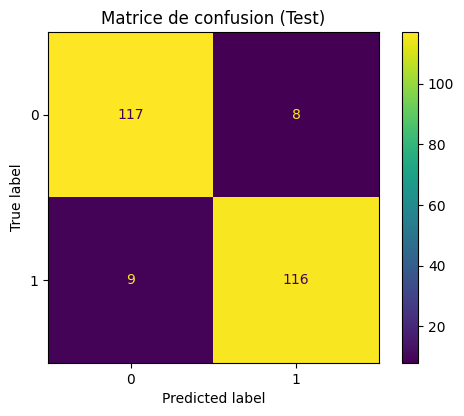

In [9]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression


# Création des données de classification

# Définition du classifieur logistique
log_classification = LogisticRegression()

# Validation croisée avec 3 folds
scores_3_folds = cross_val_score(log_classification, x, y, cv=3)
print(f'Performances avec 3 folds: {scores_3_folds}')
print(f'Performance moyenne avec 3 folds: {np.mean(scores_3_folds):.4f}')

# Validation croisée avec 5 folds
scores_5_folds = cross_val_score(log_classification, x, y, cv=5)
print(f'Performances avec 5 folds: {scores_5_folds}')
print(f'Performance moyenne avec 5 folds: {np.mean(scores_5_folds):.4f}')

# Découpage fixe
# Séparation des données en ensemble d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Entraînement du classifieur logistique
log_classification.fit(x_train, y_train)

# Prédictions sur l'ensemble de test
y_test_pred = log_classification.predict(x_test)

# Évaluation de la performance sur le découpage fixe
accuracy_fixed_split = accuracy_score(y_test, y_test_pred)
print(f'Performance sur le découpage fixe: {accuracy_fixed_split:.4f}')

# Affichage des scores de précision et du rapport de classification
print("Classification report (Test):\n", classification_report(y_test, y_test_pred))

# Calcul et affichage des matrices de confusion
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
ConfusionMatrixDisplay(conf_matrix_test, display_labels=log_classification.classes_).plot(ax=plt.gca())
plt.title('Matrice de confusion (Test)')

plt.tight_layout()
plt.show()


A vous de jouer
-----

Maintenant que vous savez exploiter la classification logistique, vous allez pouvoir la tester sur un dataset plus complexe. Nous rependrons le dataset iris vu le cours. Pour le charger, exécutez la cellule suivante

In [10]:
import pandas as pd
iris = data.load_iris(as_frame=True)
x = iris.data
y = iris.target

Pour avoir des détails sur ce dataset, exécutez les deux cellules qui suivent. Cela montre que les données d'entrée sont un vecteur de dimension 4 et que la classe à prédire est parmi 3 classes.

In [11]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
y.head(1)

0    0
Name: target, dtype: int64

In [13]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Appliquez la régression logistique sur ces données avec un découpage en train/test (sans validation croisée) et affichez les performances. Faites une évaluation en CV avec 5 fold ensuite (si besoin appliquez plus d'itérations à la classification logistique).

Accuracy (Entraînement) : 0.9732142857142857
Classification report (Entraînement) :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      0.92      0.96        39
           2       0.93      1.00      0.96        39

    accuracy                           0.97       112
   macro avg       0.98      0.97      0.97       112
weighted avg       0.98      0.97      0.97       112

Accuracy (Test) : 1.0
Classification report (Test) :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



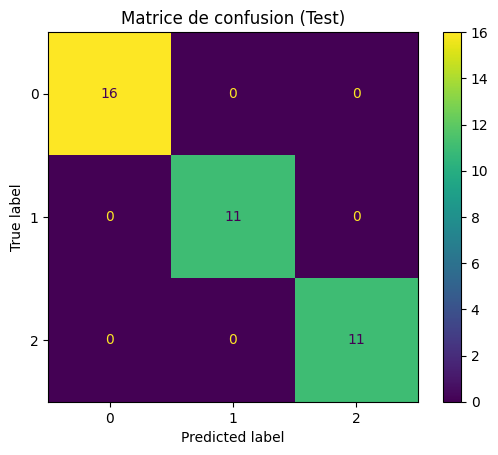

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import datasets

# Découpage en train/test
x_train, x_test, y_train, y_test = train_test_split(x, y)

# Créer et entraîner le modèle de régression logistique
log_classification = LogisticRegression(max_iter=1000)  # max_iter=1000 pour s'assurer de la convergence
log_classification.fit(x_train, y_train)

# Prédire sur l'ensemble de test
y_train_pred = log_classification.predict(x_train)
y_test_pred = log_classification.predict(x_test)

# Afficher les performances pour l'ensemble d'entraînement
print("Accuracy (Entraînement) :", accuracy_score(y_train, y_train_pred))
print("Classification report (Entraînement) :\n", classification_report(y_train, y_train_pred))

# Afficher les performances pour l'ensemble de test
print("Accuracy (Test) :", accuracy_score(y_test, y_test_pred))
print("Classification report (Test) :\n", classification_report(y_test, y_test_pred))

# Afficher la matrice de confusion pour l'ensemble de test
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(conf_matrix_test).plot()
plt.title('Matrice de confusion (Test)')
plt.show()


In [15]:
# Importer la fonction pour la validation croisée
from sklearn.model_selection import cross_val_score

# Effectuer une validation croisée avec 5 folds
log_classification_cv = LogisticRegression(max_iter=1000)
cv_scores = cross_val_score(log_classification_cv, x, y, cv=5)

# Afficher les performances moyennes
print(f"Scores de validation croisée (5 folds): {cv_scores}")
print(f"Moyenne des scores de validation croisée: {cv_scores.mean()}")


Scores de validation croisée (5 folds): [0.96666667 1.         0.93333333 0.96666667 1.        ]
Moyenne des scores de validation croisée: 0.9733333333333334


La classification Bayésienne
---------

La classification Naïve Bayésienne (à importer avec `from sklearn.naive_bayes import GaussianNB`) a été vue en cours. Appliquez là sur le dataset iris avec le même découpage que pour la classification logistique (ne refaites pas le découpage). Comparez les performances. Quel modèle est le plus performant ?

Accuracy Naïve Bayes (Entraînement) : 0.9464285714285714
Classification report Naïve Bayes (Entraînement) :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.92      0.92      0.92        39
           2       0.92      0.92      0.92        39

    accuracy                           0.95       112
   macro avg       0.95      0.95      0.95       112
weighted avg       0.95      0.95      0.95       112

Accuracy Naïve Bayes (Test) : 0.9736842105263158
Classification report Naïve Bayes (Test) :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      1.00      0.96        11
           2       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



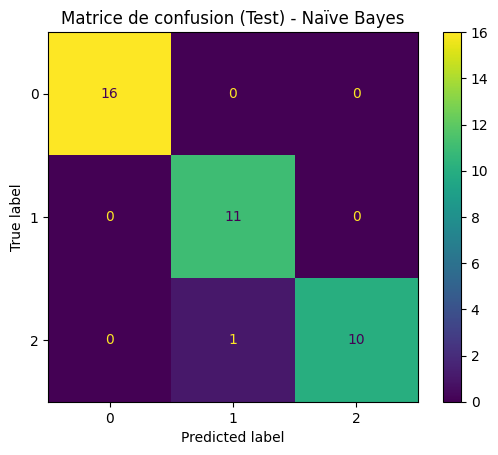

In [16]:
# Importer le classificateur Naïve Bayésien
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Créer et entraîner le modèle Naïve Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

# Prédire sur l'ensemble d'entraînement et de test
y_train_pred_nb = nb_classifier.predict(x_train)
y_test_pred_nb = nb_classifier.predict(x_test)

# Afficher les performances pour l'ensemble d'entraînement
print("Accuracy Naïve Bayes (Entraînement) :", accuracy_score(y_train, y_train_pred_nb))
print("Classification report Naïve Bayes (Entraînement) :\n", classification_report(y_train, y_train_pred_nb))

# Afficher les performances pour l'ensemble de test
print("Accuracy Naïve Bayes (Test) :", accuracy_score(y_test, y_test_pred_nb))
print("Classification report Naïve Bayes (Test) :\n", classification_report(y_test, y_test_pred_nb))

# Afficher la matrice de confusion pour l'ensemble de test
conf_matrix_test_nb = confusion_matrix(y_test, y_test_pred_nb)
ConfusionMatrixDisplay(conf_matrix_test_nb).plot()
plt.title('Matrice de confusion (Test) - Naïve Bayes')
plt.show()


Nous allons explorer la classification Bayésienne avec un dataset provenant du site Kaggle (pour les data scientists) et disponible à https://www.kaggle.com/datasets/itssuru/loan-data?resource=download. 
Le fichier csv de ce dataset est fourni dans l'archive du TP.
Cet ensemble de données comprend plus de 9 500 prêts avec des informations sur la structure du prêt, l'emprunteur et si le prêt a été remboursé dans son intégralité ou non. Ces données ont été extraites de LendingClub.com, une société qui met en relation des emprunteurs avec des investisseurs. Imaginez que vous venez d'être embauché en tant que spécialiste de l'apprentissage automatique dans une startup qui souhaite automatiser les approbations de prêts. Pour votre premier projet, votre responsable aimerait que vous construisiez un classificateur Bayésien pour prédire si un prêt sera remboursé sur la base de ces données.

Avec l'aide de pandas, chargez ce dataset dans une variable nommée *loan* et affichez les premières lignes.


In [17]:
# Importer pandas
import pandas as pd

# Charger le fichier CSV dans une variable loan
loan = pd.read_csv('loan_data.csv')

# Afficher les premières lignes du dataset
print(loan.head())

# Vérifier s'il y a des valeurs manquantes
print(loan.isnull().sum())

# Convertir la colonne 'purpose' en variables numériques (dummy variables)
loan = pd.get_dummies(loan, columns=['purpose'], drop_first=True)

# Séparer les caractéristiques (X) et la variable cible (y)
X = loan.drop('not.fully.paid', axis=1)  # Toutes les colonnes sauf la variable cible
y = loan['not.fully.paid']  # La variable cible

# Diviser en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)

nb_classifier = GaussianNB()

# Entraîner le modèle
nb_classifier.fit(X_train, y_train)

# Prédictions
y_pred_train = nb_classifier.predict(X_train)
y_pred_test = nb_classifier.predict(X_test)

# Afficher les résultats sur l'ensemble d'entraînement
print("Naïve Bayes (Entraînement) Accuracy:", accuracy_score(y_train, y_pred_train))
print("Classification report (Entraînement):\n", classification_report(y_train, y_pred_train))

# Afficher les résultats sur l'ensemble de test
print("Naïve Bayes (Test) Accuracy:", accuracy_score(y_test, y_pred_test))
print("Classification report (Test):\n", classification_report(y_test, y_pred_test))

   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0   

Nous allons ensuite supprimer la colonne 'purpose' car c'est une information symbolique et non numérique.

In [18]:
loan = pd.get_dummies(loan,drop_first=True)
loan.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


Mettez dans un vecteur nommé x toutes les colonnes de loan sauf celle nommée 'not.fully.paid' qui contient la classe à prédire (prêt remboursé ou non). Faites comme ci-dessus. Mettez dans un vecteur nommé y le contenu de la colonne nommée 'not.fully.paid'. C'est la classe à prédire (prêt remboursé ou non). Faites comme précédemment pour apprendre sur ce dataset (split train/test) et affichage des performances, avec un classifieur Naïf Bayésien. Analysez la matrice de confusion, est-ce que le modèle est satisfaisant ?
De quoi cela peut-il venir ? Pour le comprendre regardez le nombre d'instances dans chaque classe. Cela peut se faire avec `Counter(y_train)` (à importer avec `from collections import Counter`).

Dimensions des ensembles d'entraînement et de test :
(6704, 18) (2874, 18)
Naïve Bayes (Entraînement) Accuracy: 0.823538186157518
Classification report (Entraînement):
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      5637
           1       0.32      0.10      0.15      1067

    accuracy                           0.82      6704
   macro avg       0.59      0.53      0.53      6704
weighted avg       0.77      0.82      0.78      6704

Naïve Bayes (Test) Accuracy: 0.8180236604036186
Classification report (Test):
               precision    recall  f1-score   support

           0       0.84      0.96      0.90      2408
           1       0.30      0.09      0.14       466

    accuracy                           0.82      2874
   macro avg       0.57      0.52      0.52      2874
weighted avg       0.76      0.82      0.78      2874



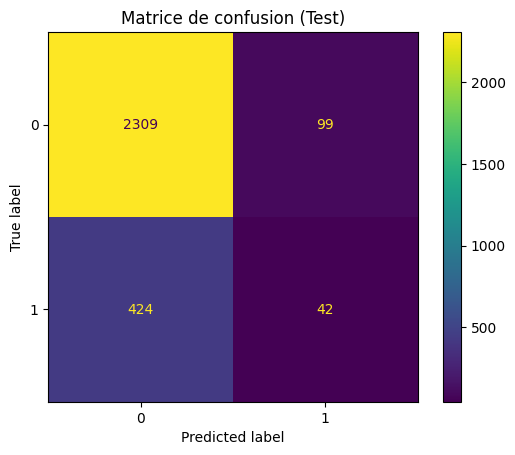

Répartition des classes dans l'ensemble d'entraînement :
Counter({0: 5637, 1: 1067})


In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from collections import Counter

# Charger les données
loan = pd.read_csv('loan_data.csv')

# Convertir la colonne 'purpose' en variables numériques (dummy variables)
loan = pd.get_dummies(loan, columns=['purpose'], drop_first=True)

# Créer les vecteurs X (caractéristiques) et y (classe à prédire)
x = loan.drop('not.fully.paid', axis=1)
y = loan['not.fully.paid']

# Diviser les données en ensembles d'entraînement et de test (70% train, 30% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Afficher les dimensions des ensembles
print("Dimensions des ensembles d'entraînement et de test :")
print(x_train.shape, x_test.shape)

# Créer le modèle Naïf Bayésien
nb_classifier = GaussianNB()

# Entraîner le modèle
nb_classifier.fit(x_train, y_train)

# Prédictions
y_pred_train = nb_classifier.predict(x_train)
y_pred_test = nb_classifier.predict(x_test)

# Afficher les résultats sur l'ensemble d'entraînement
print("Naïve Bayes (Entraînement) Accuracy:", accuracy_score(y_train, y_pred_train))
print("Classification report (Entraînement):\n", classification_report(y_train, y_pred_train))

# Afficher les résultats sur l'ensemble de test
print("Naïve Bayes (Test) Accuracy:", accuracy_score(y_test, y_pred_test))
print("Classification report (Test):\n", classification_report(y_test, y_pred_test))

# Matrice de confusion pour l'ensemble de test
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Affichage de la matrice de confusion
ConfusionMatrixDisplay(conf_matrix_test, display_labels=nb_classifier.classes_).plot()
plt.title('Matrice de confusion (Test)')
plt.show()

# Analyse de la répartition des classes dans l'ensemble d'entraînement
class_distribution = Counter(y_train)
print("Répartition des classes dans l'ensemble d'entraînement :")
print(class_distribution)


Pour contrer l'aspect non balancé de la base d'apprentissage, nous pouvons utiliser un resampling synthétique qui va générer de nouvelles instances. Cela peut se faire avec `SMOTE` (`from imblearn.over_sampling import SMOTE`). Il est possible de balancer le dataset avec l'instruction `x_train_res, y_train_res = SMOTE().fit_resample(x_train, y_train)`. Cela crée un nouveau dataset `(x_train_res, y_train_res)` et a ajouté des instances à la  classe minoritaire (à vérifier avec `Counter`). Refaites un apprentissage du classifieur Bayésien sur ces données balancées et testez sur les données de test. Comparez avec les précédents résultats.

Répartition des classes après SMOTE :
Counter({0: 5637, 1: 5637})
Naïve Bayes (Entraînement, après SMOTE) Accuracy: 0.6261309207025013
Classification report (Entraînement, après SMOTE):
               precision    recall  f1-score   support

           0       0.61      0.68      0.65      5637
           1       0.64      0.57      0.60      5637

    accuracy                           0.63     11274
   macro avg       0.63      0.63      0.63     11274
weighted avg       0.63      0.63      0.63     11274

Naïve Bayes (Test, après SMOTE) Accuracy: 0.6489213639526792
Classification report (Test, après SMOTE):
               precision    recall  f1-score   support

           0       0.87      0.68      0.76      2408
           1       0.23      0.50      0.31       466

    accuracy                           0.65      2874
   macro avg       0.55      0.59      0.54      2874
weighted avg       0.77      0.65      0.69      2874



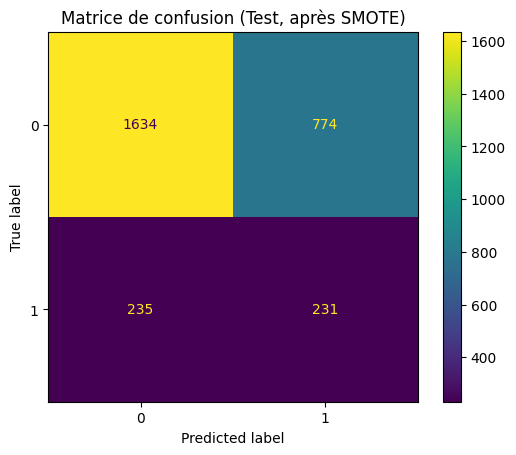

In [20]:
# Importer SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

# Appliquer SMOTE sur les données d'entraînement
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

# Vérifier la répartition des classes après resampling
print("Répartition des classes après SMOTE :")
print(Counter(y_train_res))

# Créer le modèle Naïf Bayésien
nb_classifier_res = GaussianNB()

# Entraîner le modèle sur le jeu de données rééchantillonné
nb_classifier_res.fit(x_train_res, y_train_res)

# Prédictions sur l'ensemble d'entraînement rééchantillonné et l'ensemble de test
y_pred_train_res = nb_classifier_res.predict(x_train_res)
y_pred_test_res = nb_classifier_res.predict(x_test)

# Afficher les résultats sur l'ensemble d'entraînement rééchantillonné
print("Naïve Bayes (Entraînement, après SMOTE) Accuracy:", accuracy_score(y_train_res, y_pred_train_res))
print("Classification report (Entraînement, après SMOTE):\n", classification_report(y_train_res, y_pred_train_res))

# Afficher les résultats sur l'ensemble de test
print("Naïve Bayes (Test, après SMOTE) Accuracy:", accuracy_score(y_test, y_pred_test_res))
print("Classification report (Test, après SMOTE):\n", classification_report(y_test, y_pred_test_res))

# Matrice de confusion pour l'ensemble de test après rééchantillonnage
conf_matrix_test_res = confusion_matrix(y_test, y_pred_test_res)

# Affichage de la matrice de confusion
ConfusionMatrixDisplay(conf_matrix_test_res).plot()
plt.title('Matrice de confusion (Test, après SMOTE)')
plt.show()


La classification par les k plus proches voisins
---------

La classification par les k plus proche voisins consiste, pour classer une instance $x$, à chercher les k plus proches examples de la base d'apprentissage et à affecter à $x$ la classe majoritaire. C'est un algorithme très simple, mais il faut faire attention au calcul de la distance : les attributs doivent être normalisés. Exécutez les cellules suivantes, elles montrent des illustrations du principe des kppv. Variez le nombre de voisins et constatez le résultat.

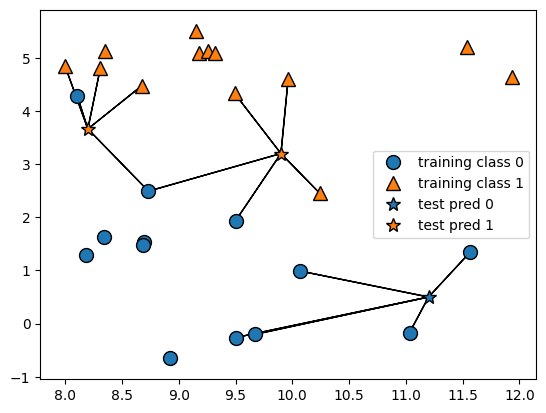

In [21]:
import mglearn
mglearn.plots.plot_knn_classification(n_neighbors=5)

Le classifier kppv de scikit-learn est `KNeighborsClassifier` (à importer par  `from sklearn.neighbors import KNeighborsClassifier`).
Créez un classifieur 3-ppv. Comme dans le TP précédent, créez un pipeline afin de scaler les données de x_train. Lancez et testez ce classifieur sur les données (x_train, y_train) et (x_test, y_test), comme précédemment. Affichez l'accuracy et comparez avec le précédent classifieur Bayésien. 
Faites varier (à l'aide d'une boucle) le nombre de voisins et regardez son influence.

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Charger le dataset
loan = pd.read_csv('loan_data.csv')

# Séparer les caractéristiques et la cible
x = loan.drop('not.fully.paid', axis=1)
y = loan['not.fully.paid']

# Convertir les colonnes catégorielles en numériques
x = pd.get_dummies(x, drop_first=True)

# Découpage en train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Mise à l'échelle des données
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Créer et entraîner le classifieur KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

# Prédictions sur l'ensemble de test
y_test_pred = knn.predict(x_test)

# Affichage de l'accuracy
print("Accuracy sur l'ensemble de test:", accuracy_score(y_test, y_test_pred))

# Affichage du rapport de classification
print("\nClassification report (Test):\n", classification_report(y_test, y_test_pred))

# Étudier l'influence du nombre de voisins
k_values = range(1, 10)  # Teste les valeurs de k de 1 à 20
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # Crée un nouveau classifieur avec k voisins
    knn.fit(x_train, y_train)  # Entraîne le modèle
    y_test_pred = knn.predict(x_test)  # Prédictions sur l'ensemble de test
    accuracies.append(accuracy_score(y_test, y_test_pred))  # Stocke l'accuracy

# Affichage des résultats
for k, acc in zip(k_values, accuracies):
    print(f"Accuracy avec k={k}: {acc:.4f}")



Accuracy sur l'ensemble de test: 0.8066805845511482

Classification report (Test):
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      2012
           1       0.25      0.10      0.14       383

    accuracy                           0.81      2395
   macro avg       0.55      0.52      0.52      2395
weighted avg       0.75      0.81      0.77      2395

Accuracy avec k=1: 0.7570
Accuracy avec k=2: 0.8326
Accuracy avec k=3: 0.8067
Accuracy avec k=4: 0.8338
Accuracy avec k=5: 0.8209
Accuracy avec k=6: 0.8347
Accuracy avec k=7: 0.8296
Accuracy avec k=8: 0.8359
Accuracy avec k=9: 0.8292
